<a href="https://colab.research.google.com/github/fkrhtmq123/Tensorflow/blob/master/tf13_auto_encoder_test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
  날짜 : 2020/08/25
  이름 : 김동욱
  내용 : 딥러닝 오토인코더(AutoEncoder) MNIST 실습하기
"""
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model

tf.__version__

'2.3.0'

In [2]:
# MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape, y_train.shape

11493376/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,))

In [3]:
# 데이터 전처리
x_train = x_train.reshape(-1, 28 * 28) / 255.0
x_test = x_test.reshape(-1, 28 * 28) / 255.0

x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [4]:
# Encoder 모델 구성
encoder_inputs = Input(shape=(784, ))

encoder_hidden = Dense(32, activation='relu')(encoder_inputs)

encoder_outputs = Dense(2)(encoder_hidden)

encoder_model = Model(encoder_inputs, encoder_outputs)
encoder_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 25,186
Trainable params: 25,186
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Decoder 모델 구성
#decoder_inputs = Input(shape=(2, ))
decoder_inputs = Dense(2)(encoder_outputs)

decoder_hidden = Dense(32, activation='relu')(decoder_inputs)

decoder_outputs = Dense(784)(decoder_hidden)

#decoder_model = Model(decoder_inputs, decoder_outputs)
#decoder_model.summary()

In [6]:
# 인코더, 디코더 모델 구성
#encoder_in = Input(shape=(784, ))
#em = encoder_model(encoder_in)
#decoder_out = decoder_model(em)

auto_encoder = Model(encoder_inputs, decoder_outputs)
auto_encoder.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_4 (Dense)              (None, 784)               25872     
Total params: 51,160
Trainable params: 51,160
Non-trainable params: 0
__________________________________________________

In [ ]:
# 모델 설정 및 학습하기
auto_encoder.compile(optimizer='adam', loss='mse')
auto_encoder.fit(x_train, 
                 x_train, 
                 epochs=20, 
                 batch_size=256)

In [20]:
# 예측하기
result = auto_encoder.predict(x_test)
result

array([[-1.2632059e-03, -1.7982512e-04,  6.2346400e-04, ...,
        -1.4949958e-03,  1.7365981e-03, -1.1579359e-03],
       [-2.8322451e-05,  3.5738782e-04, -1.3562909e-04, ...,
         1.3752427e-04, -5.6779012e-05,  7.9102785e-04],
       [ 2.1769945e-04, -1.2787594e-04, -2.1001569e-04, ...,
        -4.6892877e-04, -3.4095906e-04,  5.4937945e-04],
       ...,
       [-5.2434113e-04,  3.2500108e-04,  3.1469238e-04, ...,
        -6.1364513e-04,  2.9198267e-04, -5.0898670e-04],
       [-1.1656191e-03,  1.1598824e-03, -6.8632571e-04, ...,
         8.0942438e-04,  4.0486269e-04, -8.3648070e-04],
       [ 2.4308451e-05, -1.7744931e-04,  3.2023562e-04, ...,
        -5.5037852e-04,  7.8861043e-04,  2.4263904e-04]], dtype=float32)

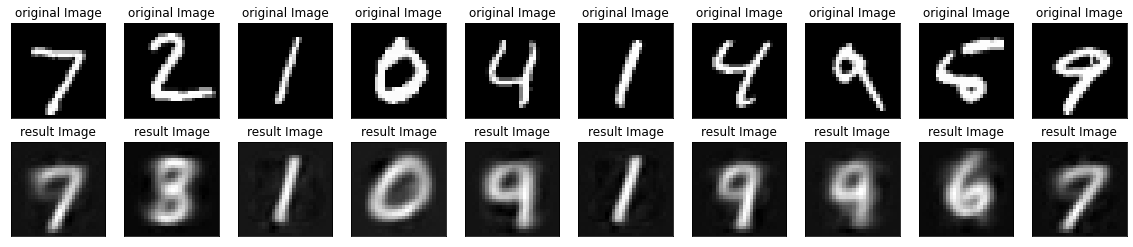

In [21]:
# 예측값 이미지 출력
plt.figure(figsize=(20, 4))

for i in range(10):
  # 오리지날 이미지
  ax = plt.subplot(2, 10, i + 1)
  ax.set_title('original Image')
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # result image
  ax = plt.subplot(2, 10, i + 11)
  ax.set_title('result Image')
  plt.imshow(result[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

In [22]:
# 인코더 모델 학습하기
#encoder_model.compile(optimizer='adam', loss='mse')
#encoder_model.fit(x_train, x_train, epochs=3, batch_size=256) 인코더와 디코더의 차수가 안 맞아 실행 안됨
encoder_pre_result = encoder_model.predict(x_test)
encoder_pre_result

array([[-7.8044252 , -1.6211804 ],
       [ 2.1544507 , -4.7128243 ],
       [ 9.558951  ,  0.21153969],
       ...,
       [-4.3800154 ,  0.34770474],
       [ 2.85628   , -0.91811395],
       [-3.230256  , -5.0779805 ]], dtype=float32)

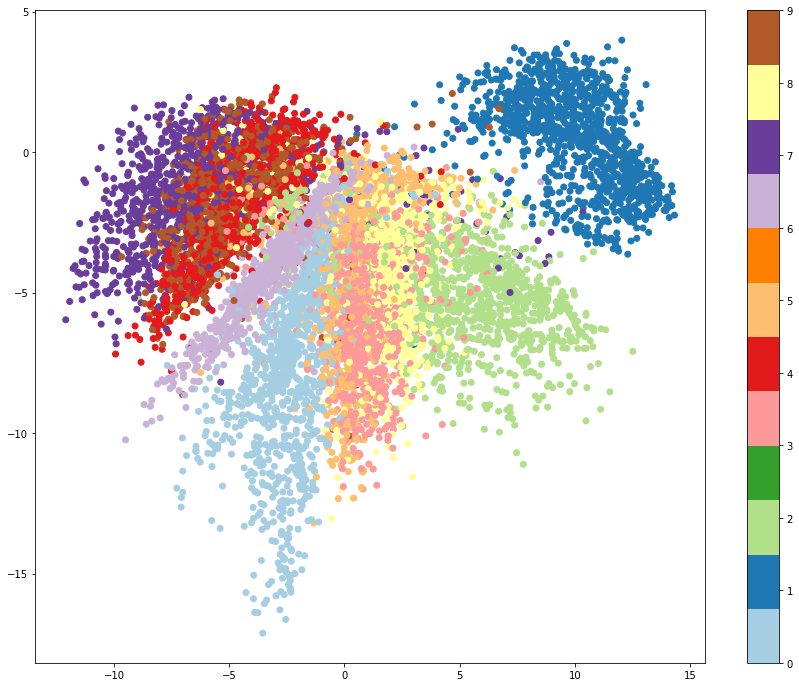

In [23]:
# 인코더 결과값 군집확인
plt.figure(figsize=(15, 12))
plt.scatter(x=encoder_pre_result[:, 0], y=encoder_pre_result[:, 1], c=y_test, cmap=plt.get_cmap('Paired'))
plt.colorbar()